# Démo Mask R-CNN - Pytorch

## Imports

In [1]:
import torch
import torchvision
import cv2
import argparse
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from src.utils import draw_segmentation_map, get_outputs


In [2]:
torch.__version__

'1.11.0'

## Setting up the pre-trained model

In [3]:
# initialize the model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True, progress=True, num_classes=91)
# set the computation device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the model on to the computation device and set to eval mode
model.to(device).eval()

def count_car(labels):
    nbcar=0;
    for k in range(len(labels)):
        if labels[k] == 'car':
            nbcar=nbcar+1;
    
        
    return nbcar

def count_label(labels,scores):
    listlabel=[];
    listlabel.append(labels[0]);
    for k in range(len(labels)):
        var=0;
        for i in range(len(listlabel)):
            if(listlabel[i]==labels[k]):
                var=1;
        if (var==0):
            listlabel.append(labels[k])
    
            
    nbperclasse=np.zeros(len(listlabel));
    for k in range(len(listlabel)):
        for i in range(len(labels)):
            if(listlabel[k]==labels[i]):
                nbperclasse[k]=nbperclasse[k]+1;
    
    return listlabel, nbperclasse

def ratio_pixel(mask,listlabel,labels):
    ratio=np.zeros(len(listlabel));
    taille=np.shape(mask);
    
    for k in range(len(labels)):
        for i in range(len(listlabel)):
            if(labels[k]==listlabel[i]):
                ratio[i]=ratio[i]+np.sum(mask[k,:,:]==True);
    
    ratio=ratio/(taille[1]*taille[2]);
    
    return ratio;

#def ratio_segmentee
                
    
        
    
    
    
    
    
    
    
    
    
    
    

## Use the model

In [4]:
image_path = "images/parking/3.jpg"

thresholdrange=[0]

image = Image.open(image_path).convert("RGB")
orig_image = image.copy()
masks, boxes, labels, scores, scoresreturn = get_outputs(image, model, thresholdrange[0])
result = draw_segmentation_map(orig_image, masks, boxes, labels)

#     _ = plt.imshow(result)
#     _ = plt.axis("off")

#bins=np.arange(0,1,0.05)

#hist=np.histogram(scoresreturn, bins)[0]
#cum=np.flip(np.cumsum(np.flip(hist)))
#plt.plot(bins,cum)


In [5]:
image_path = "images/parking/3.jpg"




thresholdrange=np.arange(0,1,0.05)
nbcar=np.zeros(len(thresholdrange));
nbperclass=[];
listlabell=[];
ratioit=[];

for k in range(len(nbcar)):
    image = Image.open(image_path).convert("RGB")
    orig_image = image.copy()
    masks, boxes, labels, scores, scoresreturn = get_outputs(image, model, thresholdrange[k])
    result = draw_segmentation_map(orig_image, masks, boxes, labels)

  #  _ = plt.imshow(result)
  #  _ = plt.axis("off")

    nbcar[k]=count_car(labels)
    listlabel, nbperclasse=count_label(labels,scores);
    
    nbperclass.append(nbperclasse)
    ratioit.append(ratio_pixel(masks,listlabel,labels));
    listlabell.append(listlabel);

[27.  5.  1.  1.  1.]
[27.  5.  1.  1.  1.]
[24.  4.  1.  1.]
[23.  3.  1.  1.]
[21.  1.  1.]
[18.  1.  1.]
[18.  1.  1.]
[17.  1.  1.]
[15.  1.  1.]
[14.  1.]
[11.  1.]
[11.]
[10.]
[9.]
[9.]
[9.]
[9.]
[8.]
[8.]
20
['car', 'person', 'stop sign', 'potted plant', 'truck']


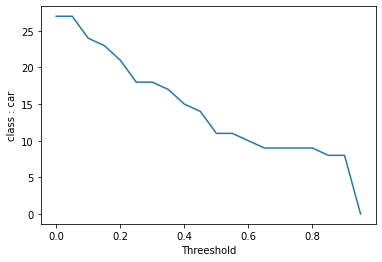

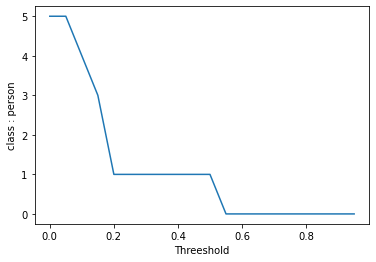

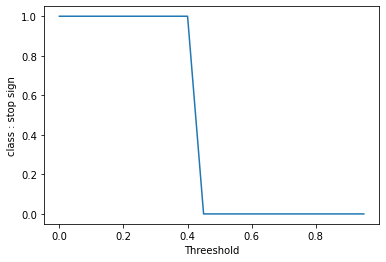

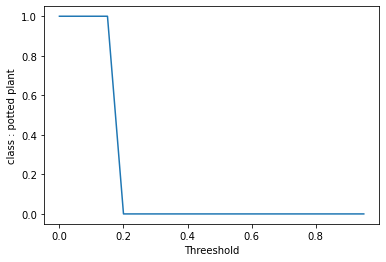

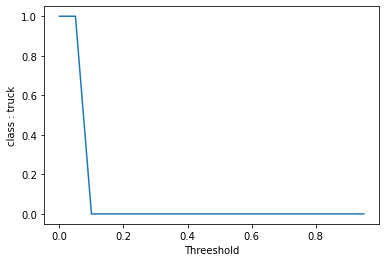

In [6]:
taillemax=np.size(ratioit[0]);
taillevector=len(np.arange(0,1,0.05));
matratio=np.zeros((taillemax,taillevector));
matnb=np.zeros((taillemax,taillevector));
#mat=np.zeros((taillemax,taillevector));
#print(mat)

for k in range(taillevector-1):
    tmp=ratioit[k];
    
    for i in range(len(tmp)):
        matratio[i][k]=tmp[i];

for k in range(taillevector-1):
    tmp=nbperclass[k];
    print(tmp)
    
    for i in range(len(tmp)):
        matnb[i][k]=tmp[i];

print(np.size(matnb[0]))

#print(ratioit[0])
#print(nbperclass[0])
#print(len(ratioit[0]))
#mat[0][0]=ratioit[0][0]
#print(matratio)
#print(matnb)
labels=listlabell[0]
print(labels)
abscisse=np.arange(0,1,0.05);
for i in range(np.size(matnb[:,1])):
   plt.plot(abscisse,matnb[i,:])
   plt.ylabel('class : '+labels[i])
   plt.xlabel('Threeshold')
   plt.show()
    





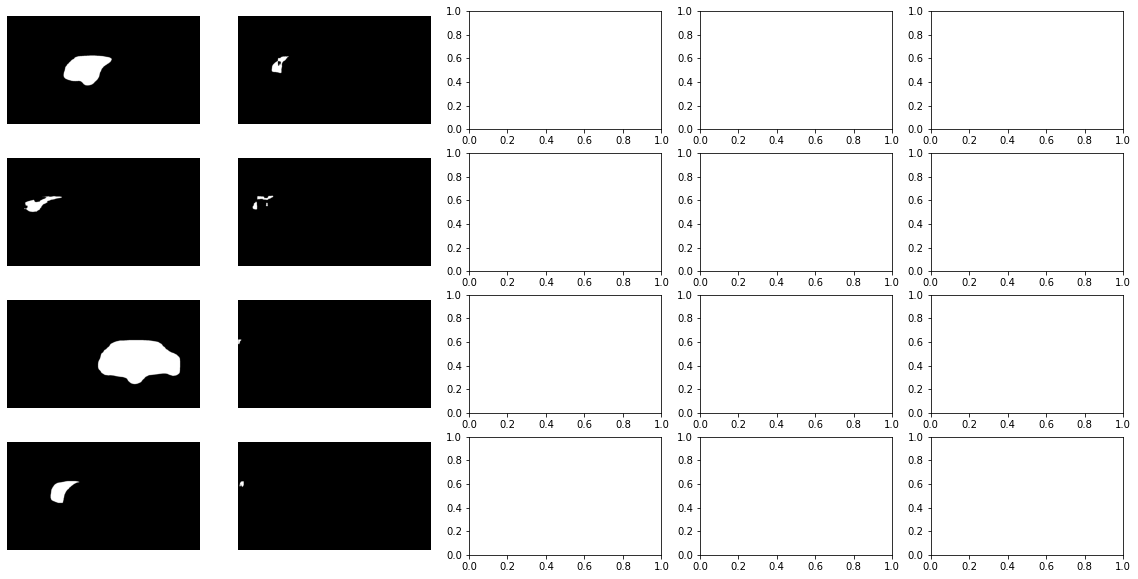

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(4, 5)
for i in range(np.shape(masks)[0]):
    ax = axs[i%4, i//4]
    ax.imshow(masks[i, :, :], cmap="gray")
    ax.axis("off")

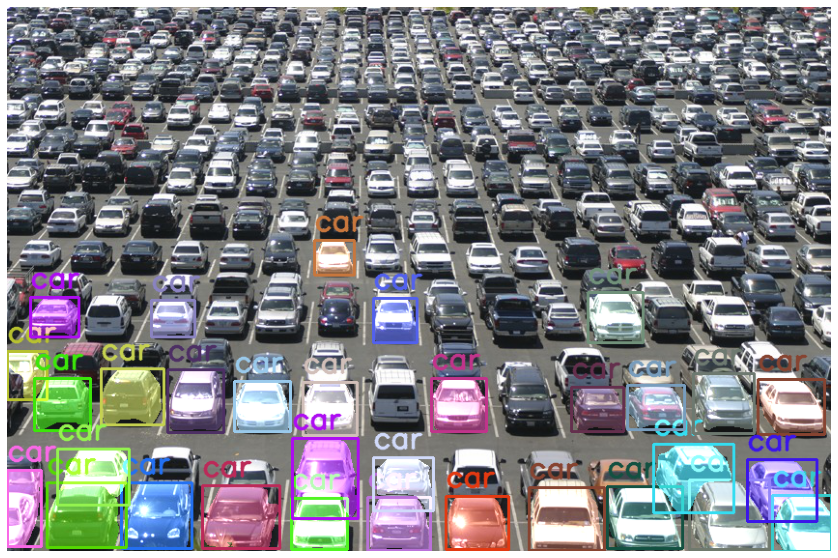

In [13]:
image_path = "images/parking/1.jpg"




thresholdrange=0.8;


image = Image.open(image_path).convert("RGB")
orig_image = image.copy()
masks, boxes, labels, scores, scoresreturn = get_outputs(image, model, thresholdrange)
result = draw_segmentation_map(orig_image, masks, boxes, labels)
_ = plt.imshow(result)
_ = plt.axis("off")

nbcar=count_car(labels)
listlabel, nbperclasse=count_label(labels,scores);
    
ratio=ratio_pixel(masks,listlabel,labels);
listlabell.append(listlabel);




In [12]:
print(nbcar)

9


In [10]:
print(len(nbcar))


TypeError: object of type 'int' has no len()

In [ ]:
print(np.size(matnb[:,1]))




In [ ]:
eva


In [ ]:
tmp=[];
var=6;
tmp.append(var);
print(tmp)


In [ ]:
print(tmp)


In [ ]:
print(listlabel); print(nbperclasse)